In [1]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt

In [2]:
def _erosion(img, kernel):
    kh = kernel.shape[0]//2
    kw = kernel.shape[1]//2
    op = np.zeros_like(img)
    m, n = img.shape


    for i in range(kh,m-kh):
        for j in range(kw,n-kw):
            flag = 1
            for x in range(-kh, kh+1):
                for y in range(-kw, kw+1):
                    if (i+x)<img.shape[0] and (i+x)>=0 and (j+y)<img.shape[1] and (j+y)>=0:
                        if kernel[x+kh][y+kw]==2:
                            continue
                        if kernel[x+kh][y+kw]!=img[i+x][j+y]:
                            flag=0
            if (flag):
                op[i][j]=1
            else:
                op[i][j]=0
    return op

In [3]:
def _dilation(img, kernel):
    kh = kernel.shape[0]//2
    kw = kernel.shape[1]//2
    op = np.zeros_like(img)
    m, n = img.shape


    for i in range(m):
        for j in range(n):
            flag = 0
            for x in range(-kh, kh+1):
                for y in range(-kw, kw+1):
                    if (i-x)<img.shape[0] and (i-x)>=0 and (j-y)<img.shape[1] and (j-y)>=0:
                        if kernel[x+kh][y+kw]==2:
                            continue
                        if kernel[x+kh][y+kw]==img[i-x][j-y]:
                            flag=1
            if (flag):
                op[i][j]=1
            else:
                op[i][j]=0
    return op

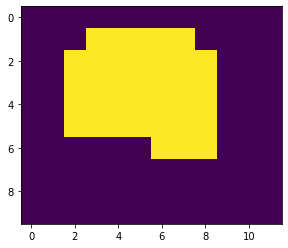

In [6]:
img = np.zeros((10,12), np.uint8)
img[2:6,2:9]=img[1,3:8]=img[6,6:9] =1
plt.imshow(img)

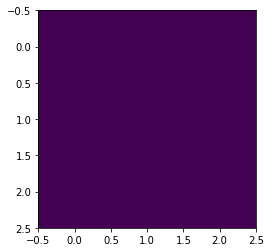

In [7]:
se = np.ones((3,3), np.uint8)
plt.imshow(se)

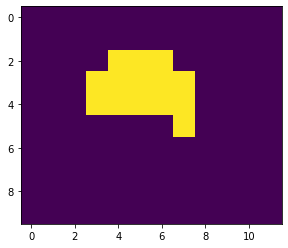

In [8]:
out = _erosion(img, se)
plt.imshow(out)

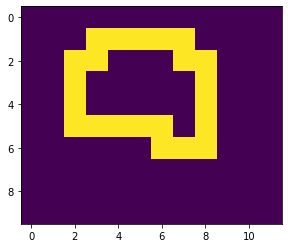

In [9]:
plt.imshow(img-out)